In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [75]:
df = pd.read_excel(u'../data/全部A股上市公司所属行业.xlsx')

In [76]:
df.head()

,SecuCode,SecuAbbr,TotalMV,FirstIndustryName,SecondIndustryName,ThirdIndustryName
0,601398,工商银行,2.052900e+08,银行,国有银行,国有银行
1,601939,建设银行,1.785078e+08,银行,国有银行,国有银行
2,601318,中国平安,1.536820e+08,非银行金融,保险,保险
3,600519,贵州茅台,1.409868e+08,食品饮料,白酒,白酒
4,601288,农业银行,1.263439e+08,银行,国有银行,国有银行


In [77]:
theme_df = pd.read_excel(u'../data/行业分类表.xlsx', sheet_name=u'中信二级行业')

In [78]:
theme_df

,金融地产,可选消费,必选医药,信息科技,其他
0,保险,白酒,其他医药医疗,IT服务,油田服务
1,证券,白色家电,中药生产,电子设备,运输设备
2,股份制与城商行,乘用车,零售,半导体,化学制品
3,房地产开发管理,小家电,生物医药,传媒,建筑施工
4,国有银行,商用车,品牌服饰,计算机软件,工程机械
5,信托及其他,照明设备及其他,其他饮料,新能源设备,普钢
6,NaN,汽车销售及服务,化学制药,计算机硬件,农用化工
7,NaN,黑色家电,食品,增值服务,航空机场
8,NaN,其他轻工,NaN,其他元器件,石油化工
9,NaN,建筑装修,NaN,汽车零部件,煤炭开采洗选


In [79]:
theme2ind = {}
for key in theme_df.columns:
    theme2ind[key] = [x for x in theme_df[key] if x is not np.nan]

In [80]:
ind2theme = {}
for key, value in theme2ind.items():
    for element in value:
        ind2theme[element] = key

In [81]:
df['Theme'] = [ind2theme[x] for x in df['SecondIndustryName']]

In [82]:
results = df.groupby('Theme')['TotalMV'].sum()

In [83]:
results = results.sort_values(ascending=False)

In [84]:
results

Theme
金融地产    1.870490e+09
其他      1.564542e+09
信息科技    1.285959e+09
可选消费    6.446227e+08
必选医药    6.244719e+08
Name: TotalMV, dtype: float64

In [85]:
weight = results / results.sum()

In [86]:
weight

Theme
金融地产    0.312264
其他      0.261189
信息科技    0.214681
可选消费    0.107615
必选医药    0.104251
Name: TotalMV, dtype: float64

([<matplotlib.patches.Wedge at 0x133f3510>,
 [Text(-1.05628,-0.30703,'金融地产'),
  Text(0.540481,-0.958061,'其他'),
  Text(0.996242,0.46637,'信息科技'),
  Text(0.13217,1.09203,'可选消费'),
  Text(-0.570402,0.940554,'必选医药')],
 [Text(-0.576154,-0.167471,'31.2%'),
  Text(0.294808,-0.522579,'26.1%'),
  Text(0.543405,0.254384,'21.5%'),
  Text(0.0720926,0.595653,'10.8%'),
  Text(-0.311128,0.513029,'10.4%')])

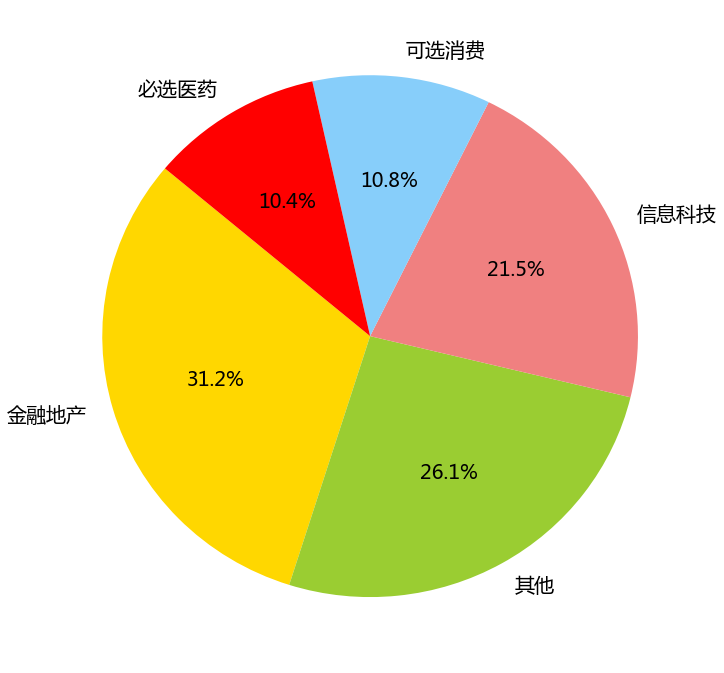

In [87]:
fig, ax = plt.subplots(figsize=(12, 12))

labels = weight.index.tolist()
sizes = weight.values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']

ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 20})